ttg duplicate

In [17]:
import pandas as pd
import numpy as np

In [18]:
datadummy = ['satu', 'satu', 'dua','tiga', 'empat', 'empat']
series1 = pd.Series(datadummy)
series1

0     satu
1     satu
2      dua
3     tiga
4    empat
5    empat
dtype: object

In [19]:
series1.drop_duplicates() #keep hanya unique values pertama

0     satu
2      dua
3     tiga
4    empat
dtype: object

In [20]:
#deteksi data duplikat. kalau true berarti duplikat

series1.duplicated()

0    False
1     True
2    False
3    False
4    False
5     True
dtype: bool

In [21]:
#deteksi data duplikat. yg di akhir yang dideteksi duplikat

series1.duplicated(keep = 'last')

0     True
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [22]:
series1.duplicated(keep = False)

0     True
1     True
2    False
3    False
4     True
5     True
dtype: bool

In [23]:
series1.drop_duplicates(keep = False)

2     dua
3    tiga
dtype: object

duplicate pada df

In [24]:
frame1 = {
    'name' : ['agung', 'fafa', 'agung', 'emik', 'william'],
    'course' : ['analis', 'marketing', 'analis', 'statistik', 'analis']
}

df1 = pd.DataFrame(frame1)
df1

,name,course
0,agung,analis
1,fafa,marketing
2,agung,analis
3,emik,statistik
4,william,analis


In [25]:
df1.duplicated() #diceknya full 1 row

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [26]:
#coba cek per kolom

df1.duplicated(subset = ['name']) #bisa lebih dari 1 kolom

0    False
1    False
2     True
3    False
4    False
dtype: bool

Combining dan bikin bins

In [27]:
#combining data

data_2017 = pd.read_csv('user_age_2017.csv')
data_2017

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017


In [28]:
data_2018 = pd.read_csv('user_age_2018.csv')
data_2018

,userid,date
0,11,1/1/2018
1,12,1/2/2018
2,13,1/3/2018


In [29]:
#concat

df_combine1 = pd.concat([data_2017, data_2018])
df_combine1

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017
0,11,1/1/2018
1,12,1/2/2018
2,13,1/3/2018


In [30]:
#perbaiki indexnya

df_combine2 = pd.concat([data_2017, data_2018], ignore_index = True)
df_combine2

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017
3,11,1/1/2018
4,12,1/2/2018
5,13,1/3/2018


In [31]:
#ngeganti format tanggal

df_combine3 = pd.concat([data_2017, data_2018], ignore_index = True)
df_combine3['date'] = pd.to_datetime(df_combine3['date'])
df_combine3

,userid,date
0,7,2017-01-01
1,8,2017-01-02
2,9,2017-01-03
3,11,2018-01-01
4,12,2018-01-02
5,13,2018-01-03


In [32]:
#nyari umur berdasarkan tanggal

from datetime import datetime

tanggal_now = datetime.now()
tanggal_now

datetime.datetime(2024, 11, 21, 20, 7, 5, 310443)

In [33]:
df_combine3['age'] = (tanggal_now - df_combine3['date']).dt.days
df_combine3 #hasilnya dalam hari

,userid,date,age
0,7,2017-01-01,2881
1,8,2017-01-02,2880
2,9,2017-01-03,2879
3,11,2018-01-01,2516
4,12,2018-01-02,2515
5,13,2018-01-03,2514


In [36]:
#binning data

binsku = [0, 2560, 2900]

labelku = ['< 2600', '2600 - 2900 day']

df_combine3['age_bin'] = pd.cut(df_combine3['age'], bins=binsku, labels=labelku)
df_combine3

,userid,date,age,age_bin
0,7,2017-01-01,2881,2600 - 2900 day
1,8,2017-01-02,2880,2600 - 2900 day
2,9,2017-01-03,2879,2600 - 2900 day
3,11,2018-01-01,2516,< 2600
4,12,2018-01-02,2515,< 2600
5,13,2018-01-03,2514,< 2600


Visualisasi data

In [37]:
data_pj = pd.read_csv('penyakit_jantung.csv')
data_pj

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,male,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,male,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,female,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,female,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,female,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
source_data = data_pj[['sex', 'age', 'cp', 'trestbps', 'chol']]
source_data

,sex,age,cp,trestbps,chol
0,female,63,3,145,233
1,female,37,2,130,250
2,male,41,1,130,204
3,female,56,1,120,236
4,male,57,0,120,354
...,...,...,...,...,...
298,male,57,0,140,241
299,female,45,3,110,264
300,female,68,0,144,193
301,female,57,0,130,131


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

MATPLOTLIB

In [ ]:
#kalau di plt harus pakai groupby kayak gini biar dia bisa mengkategorikan

group1 = source_data.groupby('age')['age'].count()
group1.head()

age
29    1
34    2
35    4
37    2
38    3
Name: age, dtype: int64

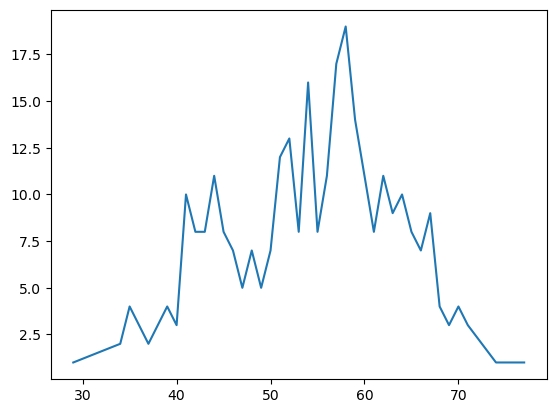

In [ ]:
plt.plot(group1.index, group1.values) #(x,y)
plt.show()

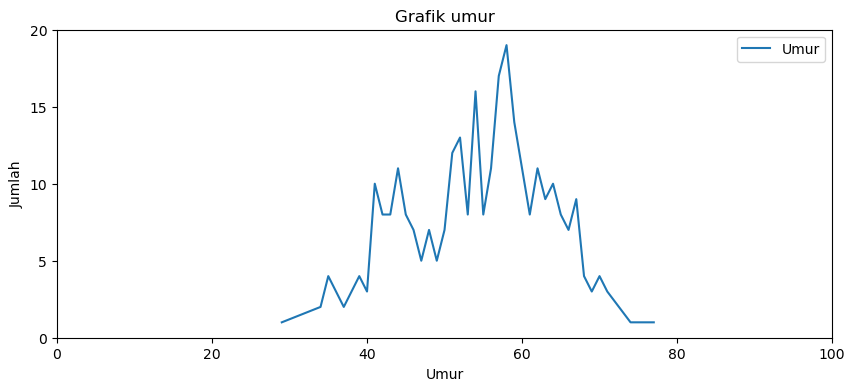

In [ ]:
plt.figure(figsize = [10 , 4]) #[lebar, tinggi]
plt.plot(group1.index, group1.values, label='Umur') #(x,y, nama label grafik)
plt.title('Grafik umur') #judul
plt.ylabel('Jumlah')
plt.xlabel('Umur')
plt.yticks([0,5,10,15,20]) #ngatur data yang muncul di y biar gak automatic
plt.xticks([0,20,40,60,80, 100]) #ngatur data yang muncul di x biar gak automatic
plt.legend()
plt.show()

In [53]:
group2 = source_data.groupby('sex')['sex'].count()
group2

sex
female    207
male       96
Name: sex, dtype: int64

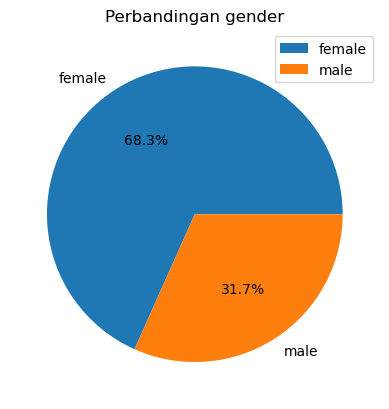

In [55]:
#pie chart

plt.pie(group2.values, labels = group2.index, autopct="%1.1f%%")
plt.title('Perbandingan gender')
plt.legend()
plt.show()

SEABORN

In [56]:
#dataviz yg numerik: sumbu y berarti counts
#datavuz kategorik: sumbu y values, x yg kategorinya

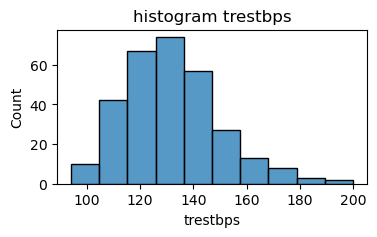

In [61]:
#histogram

plt.figure(figsize=[4,2])
sns.histplot(x='trestbps', data = source_data, bins = 10)
plt.title('histogram trestbps')
plt.show()

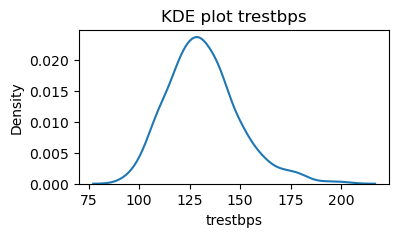

In [62]:
#KDE

plt.figure(figsize=[4,2])
sns.kdeplot(x='trestbps', data = source_data)
plt.title('KDE plot trestbps') #mirip hist, tapi pakai density
plt.show()

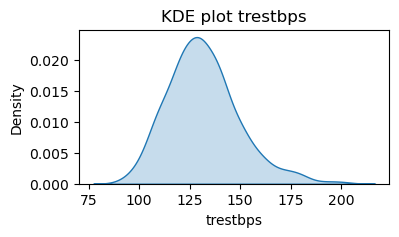

In [63]:
#KDE dengan arsiran

plt.figure(figsize=[4,2])
sns.kdeplot(x='trestbps', data = source_data, fill = True)
plt.title('KDE plot trestbps') #mirip hist, tapi pakai density
plt.show()

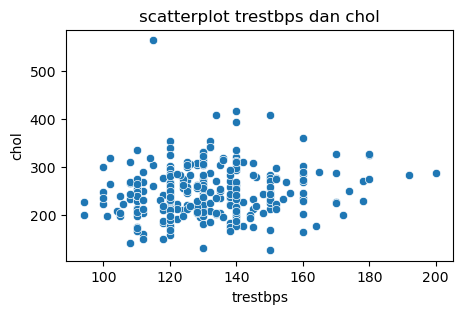

In [68]:
#scatterplot

plt.figure(figsize=[5,3])
sns.scatterplot(x = 'trestbps', y = 'chol', data = source_data)
plt.title('scatterplot trestbps dan chol')
plt.show()

c:\Users\Emik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


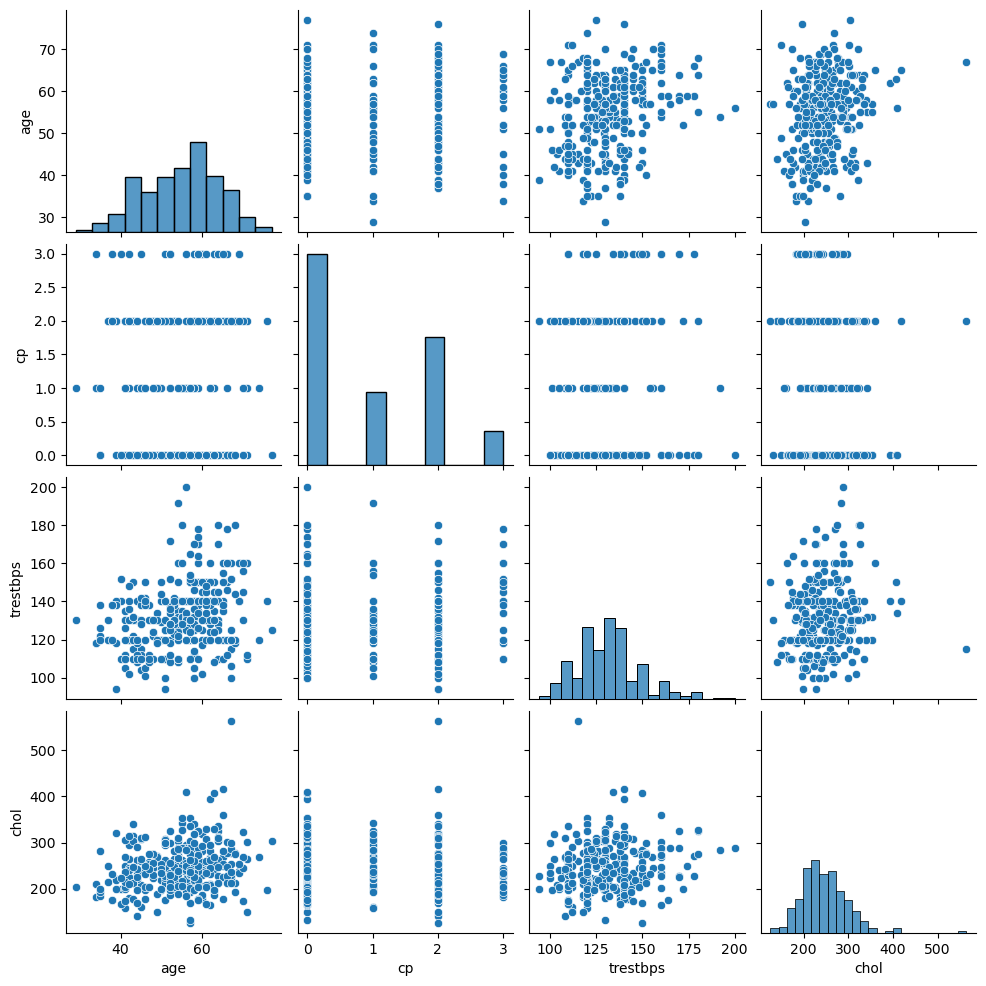

In [70]:
#pair plot

sns.pairplot(data = source_data)
plt.show()

dataviz data kategorik

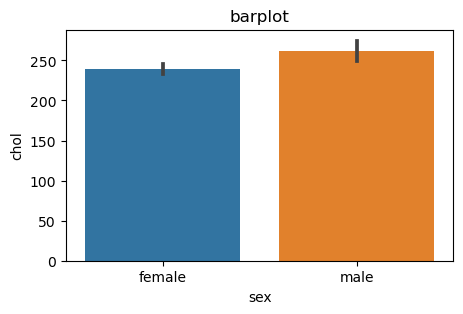

In [ ]:
#barplot

plt.figure(figsize=[5,3])
sns.barplot(x = 'sex', y = 'chol', data = source_data)
plt.title('barplot')
plt.show()

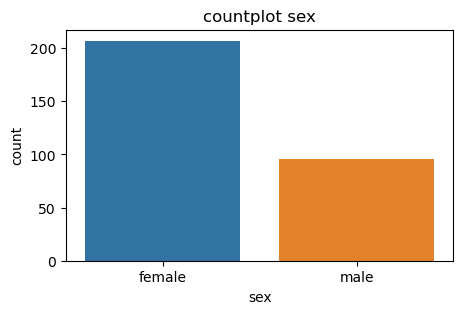

In [73]:
#countplot, mirip barplot tapi y-nya pakai count()

plt.figure(figsize=[5,3])
sns.countplot(x = 'sex', data = source_data)
plt.title('countplot sex')
plt.show()

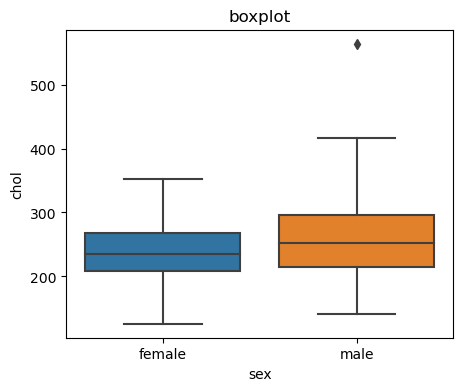

In [75]:
#boxplot

plt.figure(figsize=[5,4])
sns.boxplot(x = 'sex', y = 'chol', data = source_data)
plt.title('boxplot')
plt.show()

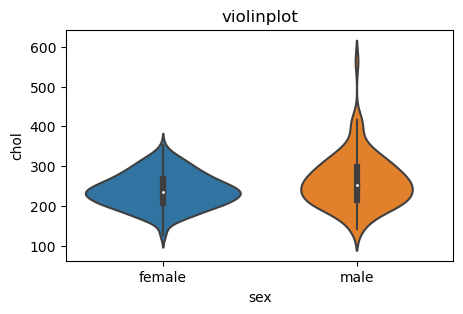

In [76]:
#violinplot

plt.figure(figsize=[5,3])
sns.violinplot(x = 'sex', y = 'chol', data = source_data) #menggabungkan kde plot dgn box plot
plt.title('violinplot')
plt.show()

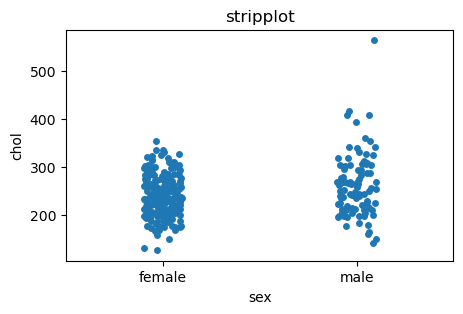

In [77]:
#stripplot

plt.figure(figsize=[5,3])
sns.stripplot(x = 'sex', y = 'chol', data = source_data) #menggabungkan violin plot dgn scatter plot
plt.title('stripplot')
plt.show()

In [79]:
#bikin pivot dulu untuk heatmap

pivot1 = source_data.pivot_table(index = 'sex', columns = 'age', values = 'chol')
pivot1 = pivot1.fillna(0)
pivot1

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
sex,,,,,,,,,,,,,,,,,,,,,
female,204.0,182.0,224.0,250.0,193.666667,270.0,196.333333,205.166667,250.0,250.0,...,240.25,247.0,252.833333,248.0,244.0,252.5,0.000000,0.0,0.0,304.0
male,0.0,210.0,183.0,215.0,0.000000,209.5,0.000000,244.000000,237.0,277.0,...,317.75,244.0,354.666667,211.0,239.0,0.0,238.666667,269.0,197.0,0.0


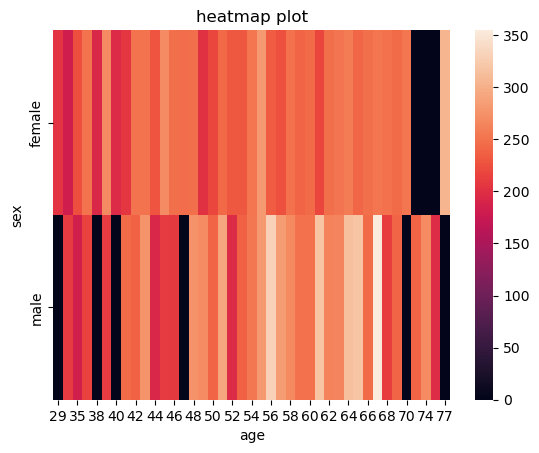

In [81]:
#heatmap 

sns.heatmap(pivot1) 
plt.title('heatmap plot')
plt.show()

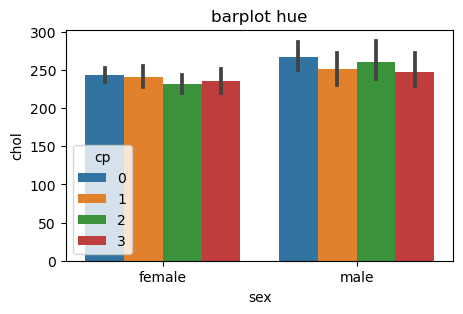

In [82]:
#barplot hue

plt.figure(figsize=[5,3])
sns.barplot(x = 'sex', y = 'chol', hue = 'cp', data = source_data)
plt.title('barplot hue')
plt.show()